In [1]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
from astropy.table import Table, vstack
import hdbscan
from pathlib import Path
import seaborn as sns
import glob
import json
%matplotlib inline
sns.set_color_codes()

In [2]:
ROOT_PATH = Path("..") 

In [3]:
table1 = Table.read(ROOT_PATH / "3filter_flat0/Halpha-DR3_errorFlag0_3f_16r.ecsv", format="ascii.ecsv")
table2 = Table.read(ROOT_PATH / "3filter_flat0/Halpha-DR3_errorFlag0_3f_16r18.ecsv", format="ascii.ecsv")
table3 = Table.read(ROOT_PATH / "3filter_flat0/Halpha-DR3_errorFlag0_3f_18r20.ecsv", format="ascii.ecsv")
table4 = Table.read(ROOT_PATH / "3filter_flat0/Halpha-DR3_errorFlag0_3f_20r21.ecsv", format="ascii.ecsv")

In [4]:
# Merge tall four tables
table_merge = vstack([table1, table2, table3, table4])
table_merge

Unnamed: 0,Field,ID,RA,DEC,FWHM,ISOarea,KRON_RADIUS,nDet_magPStotal,PhotoFlagDet,U_PStotal,F378_PStotal,F395_PStotal,F410_PStotal,F430_PStotal,G_PStotal,F515_PStotal,R_PStotal,F660_PStotal,I_PStotal,F861_PStotal,Z_PStotal,e_U_PStotal,e_F378_PStotal,e_F395_PStotal,e_F410_PStotal,e_F430_PStotal,e_G_PStotal,e_F515_PStotal,e_R_PStotal,e_F660_PStotal,e_I_PStotal,e_F861_PStotal,e_Z_PStotal,r - i,r - J0660,e(r - i),e(r - J0660),Unnamed: 0.1
int64,str13,str25,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
464,HYDRA-D-0002,iDR3.HYDRA-D-0002.000032,156.1366542698264,-35.342667924282686,2.9419925,174,2.7415805,12.0,0,18.330727,19.44981,18.096573,17.44361,16.963053,15.967049,16.46397,15.549914000000001,14.936276000000001,16.090406,14.615817999999999,14.963345,0.019821359,0.07405104,0.042316396,0.023186365,0.016223582,0.0038739613,0.0102324365,0.0028951172999999997,0.00255691,0.004064287,0.0034198917,0.0029169677,-0.5404920000000004,0.6136379999999999,0.004990003306524785,0.0038625759447367875,--
6969,HYDRA-0017,iDR3.HYDRA-0017.000100,159.7456097449217,-24.61822082802332,6.4657593,399,2.8504642999999996,12.0,0,19.393787,18.066679999999998,18.889587,17.827552999999998,17.42585,14.969037,16.687262,13.867701,13.455017000000002,14.250694000000001,12.990806,13.111298999999999,0.05769594,0.033099893,0.09335109,0.040311623,0.02903483,0.003157956,0.01545036,0.0017410432000000001,0.0017861181,0.00223182,0.002152438,0.0015608366000000001,-0.3829930000000008,0.4126839999999987,0.002830592153007254,0.0024942833222017604,--
13975,HYDRA-0026,iDR3.HYDRA-0026.018365,159.73480460089112,-25.63102146470607,4.475069,91,3.0450863999999997,12.0,0,17.916301999999998,17.657923,17.401556,16.675138,16.412342000000002,20.655086999999998,15.642656,15.674691000000001,14.939625,16.94688,14.642544000000001,18.470123,0.017243448999999998,0.021782107999999998,0.027531488,0.01765426,0.013843841,0.16653223,0.007571537,0.0035230056,0.002795894,0.008251744,0.0036813302,0.04114028,-1.2721889999999991,0.7350660000000016,0.008972337905984559,0.004497620672852187,--
20156,HYDRA-0035,iDR3.HYDRA-0035.047070,158.59916579486548,-26.49149057090181,6.860773,2224,3.7555358,12.0,0,18.051056,17.55968,17.303822,17.134777,16.925704999999997,16.509552,16.26662,15.670658,15.214592999999999,15.225252,14.984678,14.874157,0.021214005,0.022599222000000002,0.028381472,0.021825743999999998,0.01782075,0.005831635,0.009804293,0.003271118,0.0030524271999999996,0.0027201404,0.004293661,0.0028823103999999996,0.4454060000000002,0.4560650000000006,0.004254336230910312,0.0044740948560824945,--
23101,HYDRA-0039,iDR3.HYDRA-0039.015807,164.69658314642638,-27.092435835113548,2.730624,1046,2.4961398,12.0,4,15.037268,14.175274,13.764813,13.442842,13.31088,13.533442,13.030563,13.195748000000002,12.89354,13.080362,12.797226,13.0335,0.0037788229999999997,0.0035758778,0.003943383,0.0028999886,0.0025472597,0.0013175023,0.0019324715,0.0010482507000000002,0.0010177373,0.0010138444,0.001456456,0.001197239,0.11538600000000265,0.30220800000000203,0.0014583243800546744,0.0014610334499462292,--
27635,HYDRA-0044,iDR3.HYDRA-0044.058924,158.00335656245485,-27.336772807012586,2.5089161,549,2.7993376,12.0,0,15.4522705,15.047241,14.882470999999999,14.391809,14.295816,14.095478,13.940781,14.235207999999998,13.661328,13.6230135,13.645575,13.581198,0.004427772,0.005153065,0.0067192186,0.0046902583,0.0042995303,0.0017238639,0.0031233944,0.0016673679,0.0015654687,0.0012944804,0.0023065677,0.001567438,0.6121944999999975,0.5738799999999991,0.0021108754629145157,0.0022870959675164704,--
29667,HYDRA-0048,iDR3.HYDRA-0048.001555,164.74857227330833,-28.73751150613579,2.0419888,344,2.6814442,12.0,0,17.84702,17.125496,16.618242000000002,15.989320999999999,15.782845000000002,15.662597,15.033863,14.846809,14.390042

In [5]:
table_merge.colnames

['Unnamed: 0',
 'Field',
 'ID',
 'RA',
 'DEC',
 'FWHM',
 'ISOarea',
 'KRON_RADIUS',
 'nDet_magPStotal',
 'PhotoFlagDet',
 'U_PStotal',
 'F378_PStotal',
 'F395_PStotal',
 'F410_PStotal',
 'F430_PStotal',
 'G_PStotal',
 'F515_PStotal',
 'R_PStotal',
 'F660_PStotal',
 'I_PStotal',
 'F861_PStotal',
 'Z_PStotal',
 'e_U_PStotal',
 'e_F378_PStotal',
 'e_F395_PStotal',
 'e_F410_PStotal',
 'e_F430_PStotal',
 'e_G_PStotal',
 'e_F515_PStotal',
 'e_R_PStotal',
 'e_F660_PStotal',
 'e_I_PStotal',
 'e_F861_PStotal',
 'e_Z_PStotal',
 'r - i',
 'r - J0660',
 'e(r - i)',
 'e(r - J0660)',
 'Unnamed: 0.1']

In [29]:
table_merge.remove_columns(['Unnamed: 0', 'Unnamed: 0.1'])

In [30]:
# Save the final table
table_merge.write(ROOT_PATH / "3filter_flat0/Halpha-DR3_errorFlag0_merge.ecsv", format="ascii.ecsv")
table_merge.write(ROOT_PATH / "3filter_flat0/Halpha-DR3_errorFlag0_merge.dat", format="ascii")

In [7]:
# Reading the json files with synthectic photometry of the star library Pickles, A. J. (1998)
def filter_mag(e, s, f1, f2, f3):
    '''
    Calculate the colors using any of set of filters
    '''
    col, col0 = [], []
    if data['id'].endswith(e):
        if data['id'].startswith(str(s)):
            filter1 = data[f1]
            filter2 = data[f2]
            filter3 = data[f3]
            diff = filter1 - filter2
            diff0 = filter1 - filter3
            col.append(diff)
            col0.append(diff0)
    
    return col, col0

def plot_mag(f1, f2, f3):
    x, y = filter_mag("Star", "", f1, f2, f3)
    for a, b in zip(x, y):
        A1.append(a)
        B1.append(b)

In [8]:
A1, B1 = [], []

pattern = "../../MS_stars/*.json"
file_list = glob.glob(pattern)

for file_name in file_list:
    with open(file_name) as f:
        data = json.load(f)
        plot_mag("F0626_rSDSS", "F0660", "F0769_iSDSS")
len(A1)

174

Plotting the results

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


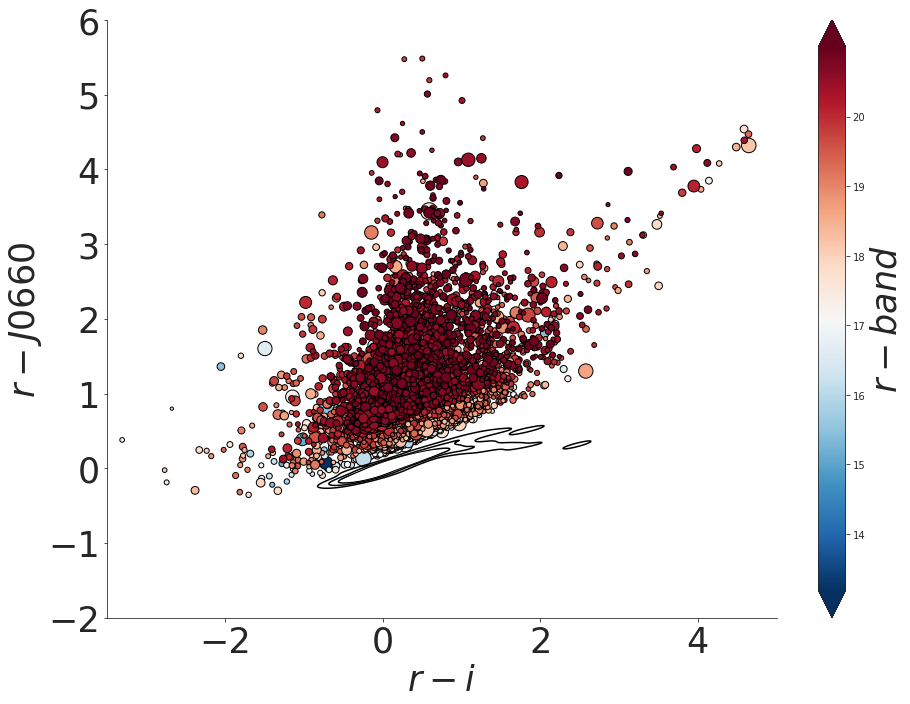

In [9]:
color_palette = sns.color_palette('Paired', 55)
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(15, 11))
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    plt.xlabel(r"$r - i$", fontsize=35)
    plt.ylabel(r"$r - J0660$", fontsize=35)
    plt.tick_params(axis='x', labelsize=35) 
    plt.tick_params(axis='y', labelsize=35)
    scat = ax.scatter(table_merge['r - i'], table_merge['r - J0660'], s=10*table_merge["FWHM"], edgecolor='black',
                             c=table_merge["R_PStotal"], zorder = 2, cmap='RdBu_r')
    #pal = sns.dark_palette("magma", as_cmap=True)
    #pal = sns.cubehelix_palette(as_cmap=True)
    pal = sns.cubehelix_palette(start=1, rot=0, dark=-10, light=50, reverse=True, as_cmap=True)
    #pal = sns.color_palette("Paired", 19, as_cmap=True)
    #pal = sns.color_palette("bright")
    ax = sns.kdeplot(B1, A1, zorder = 3, cmap=pal);
    #ax2.plot(fit_line, 0.42917 * fit_line - 0.04333, color="k", ls="--")
    ax.set(
      xlim=[-3.5, 5.],
      ylim=[-2.0, 6.])
    font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 16,
        }
    cb = fig.colorbar(scat,extend='both', ax=ax).set_label("$r-band$", fontsize=35)
    
    #ax.set_aspect("equal")
    #ax.set_title(r"(r - J0660) vs (r - i)")

# Histograms, KDE, and densities

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


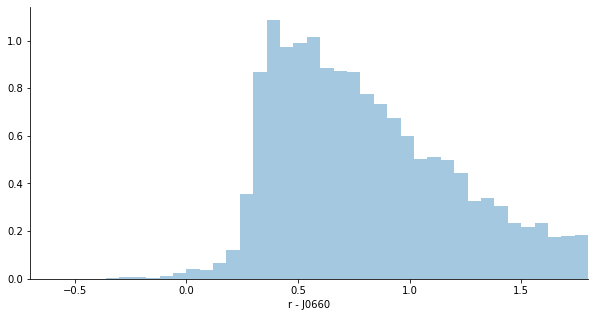

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=True)
label = f", $hhh$"
sns.distplot(table_merge["r - J0660"], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=100, hist_kws=dict(range=[-3.0, 3.0])
                )
ax.set(xlim=[-0.7, 1.8])
#ax.legend(loc='upper left')
sns.despine()

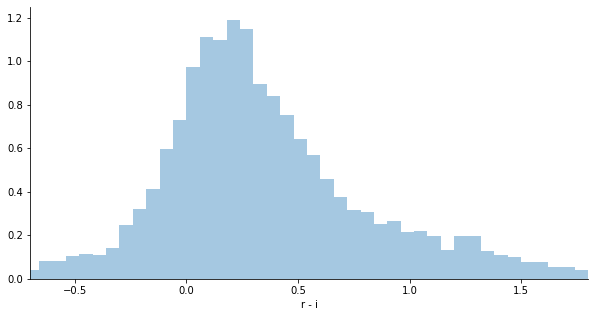

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=True)
label = f", $hhh$"
sns.distplot(table_merge["r - i"], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=100, hist_kws=dict(range=[-3.0, 3.0])
                )
ax.set(xlim=[-0.7, 1.8])
#ax.legend(loc='upper left')
sns.despine()

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


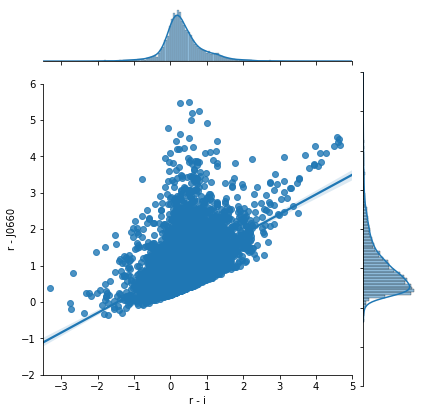

In [12]:
ax = sns.jointplot(table_merge['r - i'], table_merge['r - J0660'], kind="reg")
ax.ax_joint.set(xlim=[-3.5, 5.], ylim=[-2.0, 6.])
ax.ax_joint.set_aspect("equal")

/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


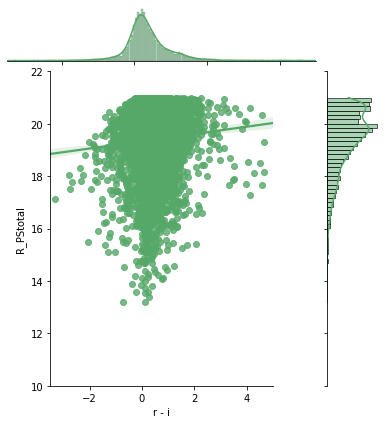

In [13]:
ax = sns.jointplot(table_merge['r - i'], table_merge['R_PStotal'], kind="reg", color="g")
ax.ax_joint.set(xlim=[-3.5, 5.0], ylim=[10, 22])
ax.ax_joint.set_aspect("equal")

# Fit Gaussian Cluster Model to shape data

In [14]:
from sklearn.mixture import GaussianMixture as GMM

Put data in form expected by scikit-learn

In [15]:
X = np.array(list(zip(table_merge['r - i'], table_merge['r - J0660'])))

In [16]:
X.shape

(6804, 2)

In [17]:
gmm = GMM(n_components=2).fit(X)

In [18]:
labels = gmm.predict(X)

In [19]:
labels

array([0, 0, 1, ..., 0, 0, 0])

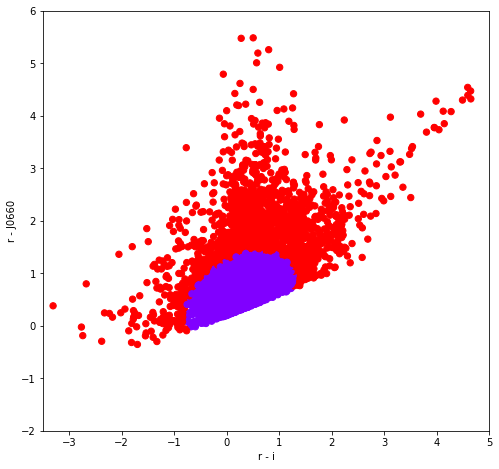

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(table_merge['r - i'], table_merge['r - J0660'], c=labels, s=40, cmap="rainbow")
ax.set(
    xlim=[-3.5, 5.], ylim=[-2.0, 6.],
    xlabel=r"r - i",
    ylabel=r"r - J0660",
)
ax.set_aspect("equal")



$\textbf{Defining new colors}$

In [21]:
# definition for the colors
def colour(table, f1, f2, f3, f4):
    xcolour = table[f1] - table[f2]
    ycolour = table[f3] - table[f4]
    return xcolour, ycolour

In [22]:
cx, cy = colour(table_merge, "G_PStotal", "Z_PStotal", "G_PStotal", "F660_PStotal")

#Put data in form expected by scikit-learn (and without big a lower colors)
m = (cx > -10) & (cx < 10) & (cy > -10) & (cy < 10)
X1 = np.array(list(zip(cx[m], cy[m])))
X1.shape

(6666, 2)

In [23]:
gmm1 = GMM(n_components=3).fit(X1)

In [24]:
labels1 = gmm1.predict(X1)

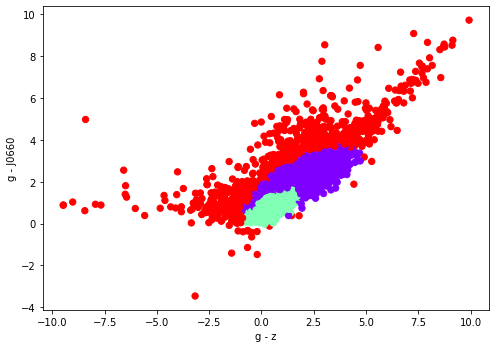

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(cx[m], cy[m], c=labels1, s=40, cmap="rainbow")
ax.set(
    #xlim=[-3.5, 5.], ylim=[-2.0, 6.],
    xlabel=r"g - z",
    ylabel=r"g - J0660",
)
ax.set_aspect("equal")



/home/luis/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


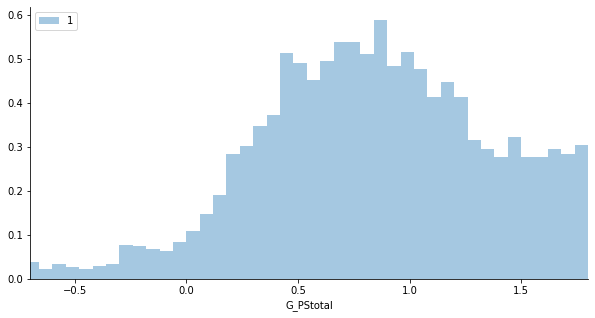

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=True)
label = f", $hhh$"
sns.distplot(cx[m], 
                 norm_hist=True, kde=False, ax=ax,
                 label=labels1, bins=100, hist_kws=dict(range=[-3.0, 3.0])
                )
ax.set(xlim=[-0.7, 1.8])
ax.legend(loc='upper left')
sns.despine()